# Sistemas Inteligentes

## Exercício Computacional 4 - Agrupamento (Clusterização)

### Identificação do Aluno

#### Nome Completo

ESCREVA AQUI A SUA RESPOSTA

#### RA

ESCREVA AQUI A SUA RESPOSTA

## Instruções

1. Escolha um dataset, identifique-o e mostre suas características, então indique quais são os seus objetivos com esse dataset (no campo correspondente).

2. Com o dataset já importado para o notebook, faça os pré-processamentos que julgar necessários e, se for conveniente, efetue uma redução de dimensionalidade utilizando um método compatível com seus dados.

3. Utilize ao menos um método de Cross-Validation de sua preferência.

4. Escolha dois métodos de agrupamento (clusterização) para realizar abordagens distintas, então aplique-os ao dataset para chegar ao objetivo indicado por você no próprio notebook.

5. Utilize células intermediárias de tipo _Markdown_ para explicar o que é feito em cada célula de código. Mas não deixe de utilizar comentários breves e pertinentes dentro do próprio código. Isto significa que o desenvolvimento NÃO deve ser feito em uma única célula.

6. Sempre que for cabível, exiba as figuras, os gráficos, os valores (ao menos parte deles) etc., mas procure sempre manter um capricho em todas as saídas.

7. Ao final, comente da forma mais completa possível os resultados obtidos, sempre sugerindo o que poderia ser feito para melhorá-los e fornecendo elementos que contribuam para a sua compreensão.

8. Respeitem as regras gramaticais e procurem manter coesão, coerência e fluidez em seus textos.

9. Apesar de a análise dos resultados ser mais importante do que o código em si, serão analisados critérios como organização e clareza do código, então evitem códigos "poluídos" e confusos.

### Dataset

#### Nome do Dataset

Wine recognition

#### Características do Dataset

Este dataset é muito conhecido e utilizado pela comunidade junto com o sklearn por ser uma dataset simples e conhecido como "Toy Dataset" e divid

Os dados são uma análise química das uvas crescidas em uma região da Itália. São treze medidas diferentes presentes em três tipos de vinhos.
The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

#### Fonte do Dataset

ESCREVA AQUI

### Objetivos

ESCREVA AQUI

## Desenvolvimento

Import de todos as bibliotecas e métodos necessários

In [53]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.decomposition import FastICA
from sklearn.cluster import AffinityPropagation, KMeans
from sklearn.metrics import v_measure_score
import numpy as np
import matplotlib.pyplot as plt

Definimos as variáveis de dados e target e verificamos suas dimensões.

In [25]:
X, y = load_wine(return_X_y=True)
np.shape(X)

(178, 13)

Usamos o FastICA para reduzir para duas dimensões.

In [27]:
fastICA = FastICA(n_components=2)
fastICA.fit(X)
X_ICA = fastICA.transform(X)
np.shape(X_ICA)

(178, 2)

Dividimos os dados entre treino e teste (15%).

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_ICA, y, test_size=0.15, random_state=42)

Preparamos os centroides dos clustering.

In [33]:
centroide0 = []
centroide1 = []
centroide2 = []

for i in range(y_train.shape[0]):
    if y_train[i] == 0:
        centroide0.append(X_train[i])
    if y_train[i] == 1:
        centroide1.append(X_train[i])
    else:
        centroide2.append(X_train[i])
        
centroide0 = np.array(centroide0)
centroide1 = np.array(centroide1)
centroide2 = np.array(centroide2)

centroide0_cm = np.array([np.mean(centroide0[:,0]), np.mean(centroide0[:,1])])
centroide1_cm = np.array([np.mean(centroide1[:,0]), np.mean(centroide1[:,1])])
centroide2_cm = np.array([np.mean(centroide2[:,0]), np.mean(centroide2[:,1])])

cm = np.vstack((centroide0_cm, centroide1_cm, centroide2_cm))

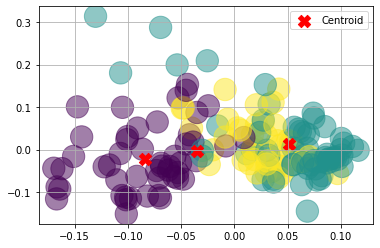

In [34]:
plt.figure()
plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_train, cmap="viridis", s=500, alpha=0.5)
plt.grid(True)

plt.scatter(x=cm[:,0], y=cm[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

Criamos e treinamentos os dois clusterizadores, Affinity Propagation e KMeans.

In [41]:
affinityP = AffinityPropagation(random_state=50).fit(X_train)
ap_pred = affinityP.predict(X_test)

In [45]:
kmeans = KMeans(n_clusters=3).fit(X_train)
kmeans_pred = kmeans.predict(X_test)

Resultado do Affnity Propagation:

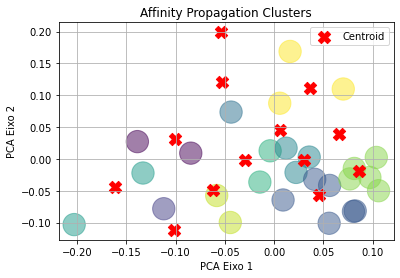

In [49]:
plt.figure()
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=ap_pred, cmap='viridis', s=500, alpha=0.5)

plt.xlabel('PCA Eixo 1')
plt.ylabel('PCA Eixo 2')
plt.title('Affinity Propagation Clusters')
plt.grid(True)

plt.scatter(x=affinityP.cluster_centers_[:,0], y=affinityP.cluster_centers_[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

Resultado do k-Means:

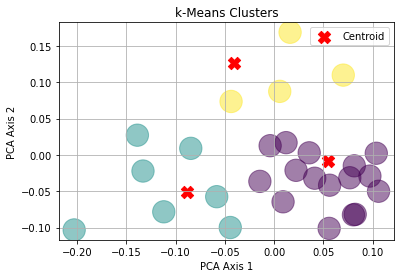

In [50]:
plt.figure()
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=kmeans_pred, cmap='viridis', s=500, alpha=0.5)
plt.xlabel('PCA Eixo 1')
plt.ylabel('PCA Eixo 2')
plt.title('k-Means Clusters')
plt.grid(True)

plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

Usamos o V-Measure Score como algoritmo de cross-validation, por ser muito eficaz em clusteres.

In [55]:
vsc_ap = v_measure_score(y_test, ap_pred)
print(f"V-Score do Affinity Propagation: {vsc_ap}")

vsc_kmeans = v_measure_score(y_test, kmeans_pred)
print(f"V-Score do KMeans: {vsc_kmeans}")

V-Score do Affinity Propagation: 0.40537218195792685
V-Score do KMeans: 0.43044579747117334


## Discussão sobre os resultados

ESCREVA AQUI